## Q1. Read the “student.csv” and convert the data into multiple sheet with their class wise sheet name. Output file must be like “student -final sheet.xlsx”

In [1]:
# imports required

import pandas as pd
import xlsxwriter

In [2]:
# reading the "student.csv" file

students_csv = pd.read_csv("student.csv")
students_csv.head()

,Name,Class
0,Maaz,4_Standard
1,Shahzaib,6_Standard
2,A. Baseer,1_Standard
3,M.Hussain,5_Standard
4,Ghufran,4_Standard


In [3]:
unique_classes = sorted(set(students_csv["Class"].to_list()))

unique_classes

['1_Standard',
 '2_Standard',
 '3_Standard',
 '4_Standard',
 '5_Standard',
 '6_Standard',
 '7_Standard',
 '8_Standard',
 '9_Standard']

In [4]:
# creating list of excel sheets with saperate data-frames based on classes

sheets_list = []

for _class in unique_classes:
    filterr = students_csv["Class"] == _class
    sheets_list.append(students_csv.where(filterr).dropna())

In [5]:
# saving the classified dataframes in excel file with multiple sheets

with pd.ExcelWriter(path="student -final sheet.xlsx", engine='xlsxwriter') as writer:
    for i in range(len(unique_classes)):
        sheets_list[i].to_excel(writer, index=False, sheet_name=unique_classes[i])

## Q2. Convert the “Log file into CSV”

### Read the “sysmexdata24.log” and Convert Log file into CSV. 

In [6]:
# imports required

import re
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def remove_escape(s: str):
    # charchters allowed in the string are defined in the pattern
    s = re.sub("[^a-zA-Z0-9-._?*'/#% ]+", ' ', s)
    return s

In [8]:
def clean_log_lines(lines: list):
    
    """
    This function returns list of cleaned and readable lines 
    """
    # Empty list for storing cleaned data
    
    cleaned_lines = []
    
    # Loop with step value of 2 since we are collecting data of two lines as per the observed pattern
    
    for i in range(0, len(lines)):
        
        # single value line
        line = remove_escape(lines[i])
        cleaned_lines.append(line)
        
    return cleaned_lines

In [9]:
def get_rows(c_lines: list):
    
    """
    This function will iterate over lines and do the following:
        -> Detect header
        -> If header is detected:
            * create empty dictionary to store row values from next lines
            * Iterate untill next header detected
        -> Looping above step untill we reach end of number of lines
    """
    
    # empty list for storing data rows
    rows = []
    
    # iterating over lines
    for j in range(len(c_lines)):
        
        line = c_lines[j]
        
        # list of columns we lookup for in lines
        head_ = [
            'WBC', 'RBC', 'HGB', 'HCT', 'MCV',
            'MCH', 'MCHC', 'PLT', 'RDW-SD', 'RDW-CV',
            'PDW', 'MPV', 'P-LCR', 'PCT', 'NEUT%',
            'LYMPH%', 'MONO%', 'EO%', 'BASO%'
        ]
        
        # The text through which we detect header
        header_text = "WBC RBC HGB HCT MCV MCH MCHC PLT RDW-SD RDW-CV PDW MPV P-LCR PCT"
        
        if header_text in line:
            
            # Empty dictionary to store row data
            row_dict = {}
            
            # removing empty elements from header and make it list of header values to get study_id
            header = [word.strip() for word in line.split(' ') if word.strip() != '']
            
            # 3rd item is study_id in our cleaned list of words of header line
            row_dict["study_id"] = header[2]
            
            # iterating over next lines to get header values untill we get the next header or we reach end of lines
            next_line = c_lines[j+1]
            
            while header_text not in next_line:
                
                line_words = [word.strip() for word in next_line.split(' ') if word.strip() != '']
                    
                # 3rd item of cleaned words list is what we look up as a header text if there is any
                try:
                    f_w = line_words[2]
                    # if the word is header
                    if f_w in head_:
                        # Since we have the date value in each line, we have to compromise and save it from here
                        row_dict['Date'] = line_words[-1]
                        # save its value in row dictionary which will be present at item 4 in our row data
                        row_dict[f_w] = line_words[4]
                except IndexError:
                    pass
                
                j += 1
                if j < (len(c_lines)-1):
                    next_line = c_lines[j+1]
                else:
                    break
                    
            
            # Checking if any of the header not found in previous rows. If yes, then add None to the value
            for h in head_:
                if h not in row_dict.keys():
                    row_dict[h] = None
            
            rows.append(row_dict)
    
    return rows

In [10]:
# Function to convert string digits into float in data-frame
def convert_str(val: str):
    if val == "----":
        return np.nan
    try:
        return float(val)
    except:
        return val

In [11]:
# Reading the log file
with open("sysmexdata24.log") as file:
    # lines of log file with scrap
    ls = file.readlines()

# Cleaned lines of log file
cl = clean_log_lines(ls)

# Formatted rows of data from clean lines of log file
rows_data = get_rows(cl)

# forming a data-frame of rows and columns

cols = [
    'study_id', 'Date',
    'WBC', 'RBC', 'HGB', 'HCT', 'MCV',
    'MCH', 'MCHC', 'PLT', 'RDW-SD', 'RDW-CV',
    'PDW', 'MPV', 'P-LCR', 'PCT', 'NEUT%',
    'LYMPH%', 'MONO%', 'EO%', 'BASO%'
]

df = pd.DataFrame(rows_data, columns=cols)

# Formatting dataframe columns before saving the data
for i in range(2, len(cols)):
    try:
        df.iloc[:, i] = df.iloc[:, i].apply(convert_str)
    except:
        pass
df

,study_id,Date,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,...,RDW-CV,PDW,MPV,P-LCR,PCT,NEUT%,LYMPH%,MONO%,EO%,BASO%
0,31DTS02,20220923162802,1.69,5.52,15.6,48.8,88.4,28.3,32.0,117.0,...,15.0,19.5,13.3,54.5,0.16,7.1,69.8,14.8,5.9,2.4
1,30DTS02,20220923162700,2.85,5.95,14.2,44.5,74.8,23.9,31.9,189.0,...,15.8,13.7,11.1,32.8,0.21,4.9,67.4,19.3,4.9,3.5
2,29DTS02,20220923162545,1.96,5.81,15.9,48.7,83.8,27.4,32.6,204.0,...,14.6,15.5,12.0,40.5,0.24,6.6,68.9,15.3,6.6,2.6
3,28DTS02,20220923162435,1.95,3.64,5.6,20.5,56.3,15.4,27.3,364.0,...,23.9,NaN,NaN,NaN,NaN,13.8,51.8,15.4,15.9,3.1
4,27DTS02,20220923162326,3.38,5.39,12.8,40.2,74.6,23.7,31.8,256.0,...,13.3,14.0,11.6,37.0,0.30,10.9,64.8,12.4,9.8,2.1
5,24DTS02,20220923162057,5.69,6.38,17.0,51.0,79.9,26.6,33.3,154.0,...,13.9,20.0,13.9,56.2,0.21,33.6,46.9,12.3,4.2,3.0
6,20DTS02,20220923161758,1.76,5.19,16.0,48.2,92.9,30.8,33.2,136.0,...,13.9,17.2,12.8,48.8,0.17,9.2,63.6,19.3,4.5,3.4
7,18DTS02,20220923161652,1.84,4.74,13.0,39.3,82.9,27.4,33.1,90.0,...,12.9,22.1,16.2,72.8,0.15,44.1,42.4,9.2,1.6,2.7
8,17DTS02,20220923161532,2.80,5.19,12.7,40.0,77.1,24.5,31.8,148.0,...,17.1,22.0,13.3,51.5,0.20,12.1,70.4,12.1,3.6,1.8


In [12]:
# Saving log data as csv

df.to_csv("sysmexdata24.csv", index=False)

### Show Basic Statistics of the Data

In [13]:
# Storing the local statics to detect outliers later in plots
bs = df.describe()

bs

,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,RDW-SD,RDW-CV,PDW,MPV,P-LCR,PCT,NEUT%,LYMPH%,MONO%,EO%,BASO%
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2.657778,5.312222,13.644444,42.355556,78.966667,25.333333,31.888889,184.222222,41.711111,15.600000,18.000000,13.025000,49.262500,0.205000,15.811111,60.666667,14.455556,6.333333,2.733333
std,1.283177,0.790376,3.405184,9.303643,10.467330,4.372070,1.829238,83.541573,4.691866,3.370831,3.389901,1.596201,12.722077,0.048697,13.611249,10.716693,3.367162,4.237334,0.574456
min,1.690000,3.640000,5.600000,20.500000,56.300000,15.400000,27.300000,90.000000,35.300000,12.900000,13.700000,11.100000,32.800000,0.150000,4.900000,42.400000,9.200000,1.600000,1.800000
25%,1.840000,5.190000,12.800000,40.000000,74.800000,23.900000,31.800000,136.000000,38.100000,13.900000,15.125000,11.900000,39.625000,0.167500,7.100000,51.800000,12.300000,4.200000,2.400000
50%,1.960000,5.390000,14.200000,44.500000,79.900000,26.600000,32.000000,154.000000,41.100000,14.600000,18.350000,13.050000,50.150000,0.205000,10.900000,64.800000,14.800000,4.900000,2.700000
75%,2.850000,5.810000,15.900000,48.700000,83.800000,27.400000,33.100000,204.000000,46.200000,15.800000,20.500000,13.450000,54.925000,0.217500,13.800000,68.900000,15.400000,6.600000,3.100000
max,5.690000,6.380000,17.000000,51.000000,92.900000,30.800000,33.300000,364.000000,46.800000,23.900000,22.100000,16.200000,72.800000,0.300000,44.100000,70.400000,19.300000,15.900000,3.500000


### Create Bar Graph, Clusters to find the outliers of the data. You can create other graphs as well.

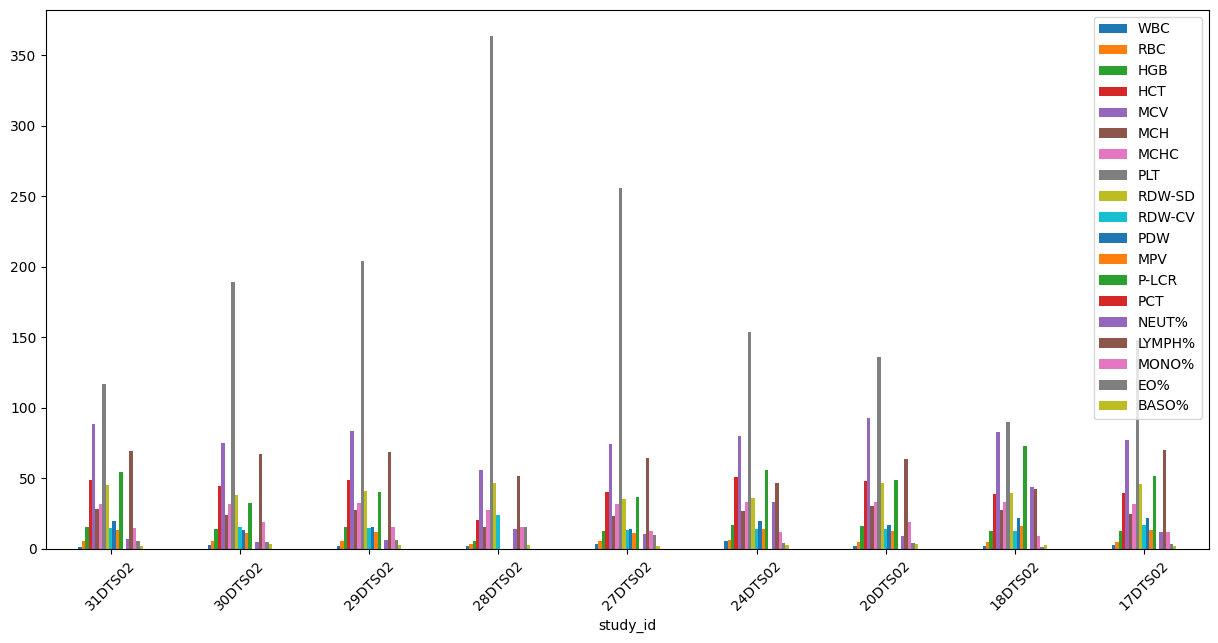

In [14]:
# Combined bar graph

df.plot(kind='bar', x='study_id', figsize=(15,7), rot=45)
plt.legend(loc='upper right')

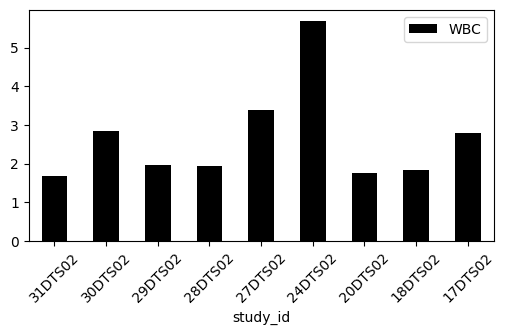

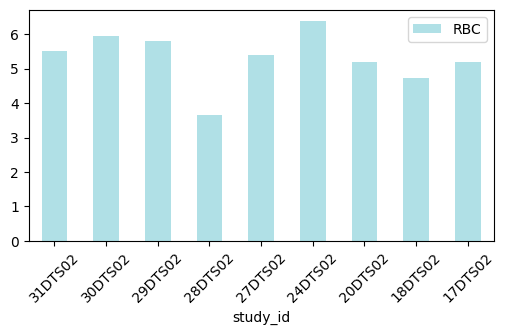

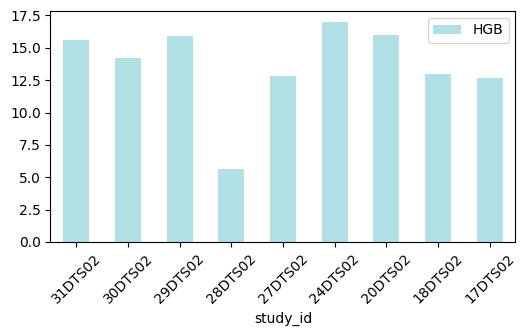

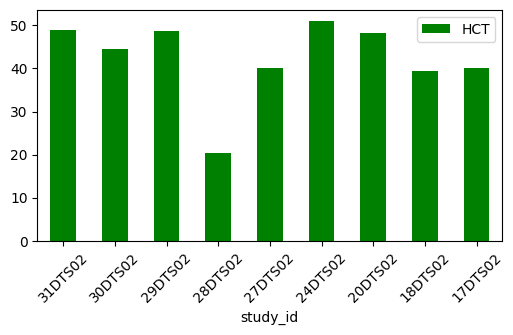

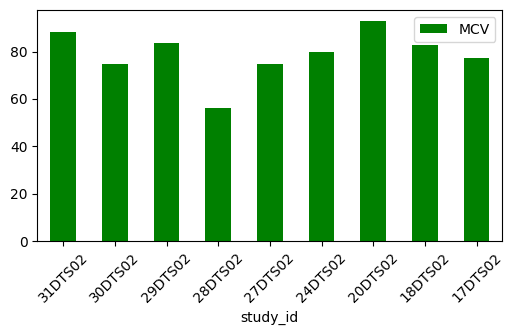

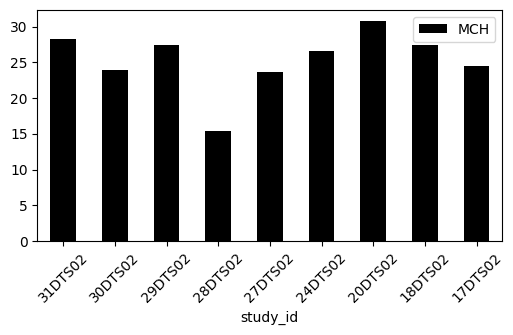

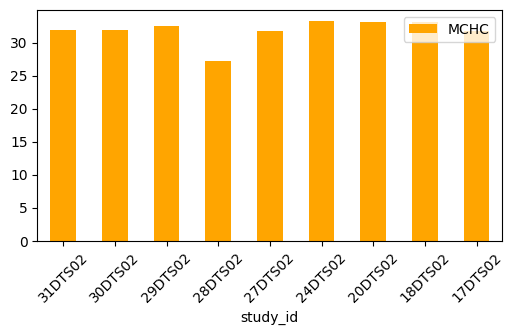

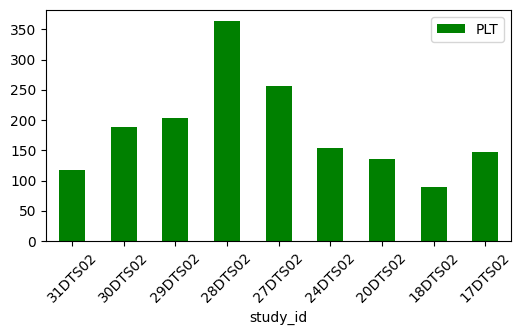

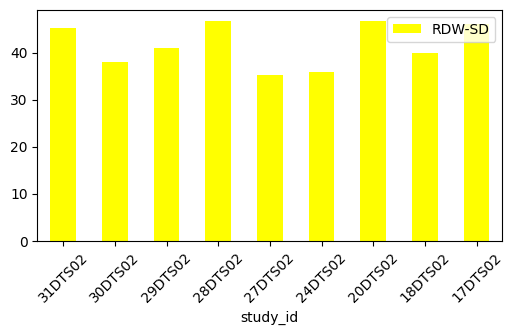

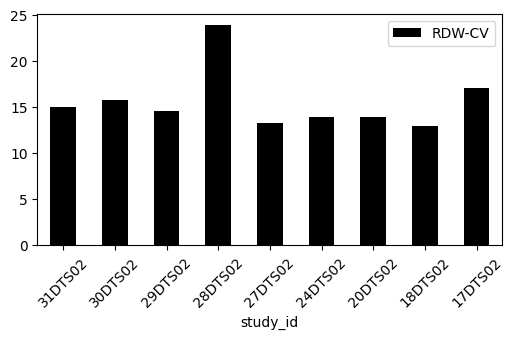

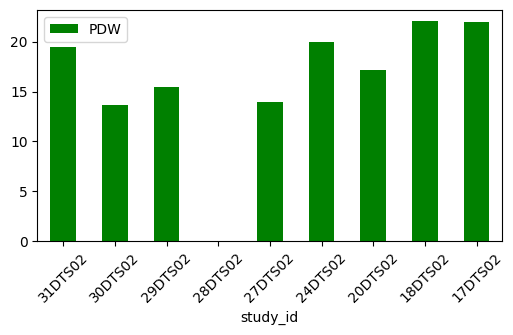

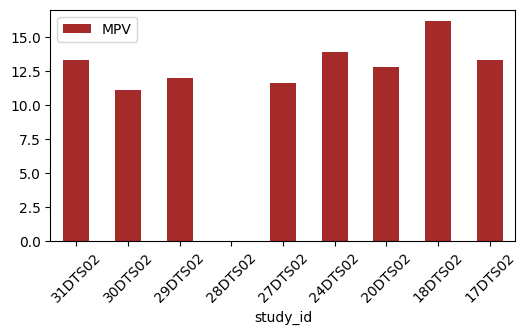

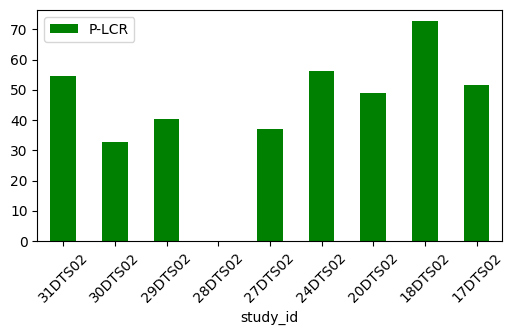

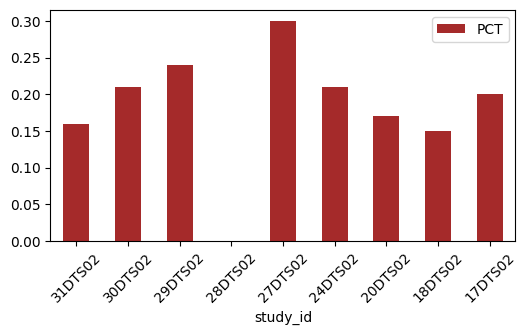

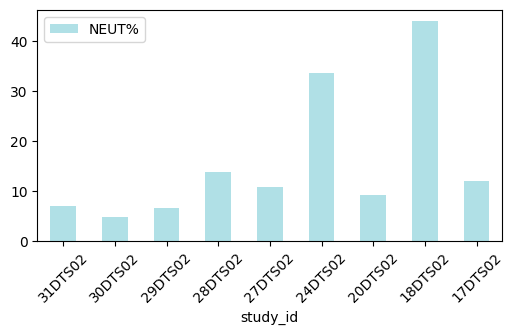

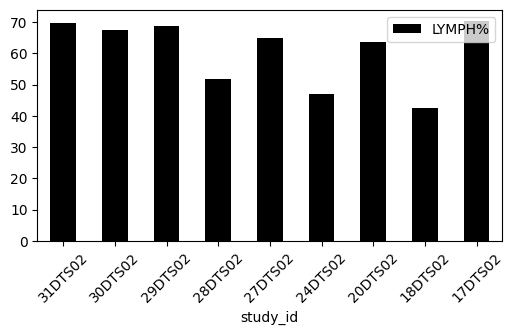

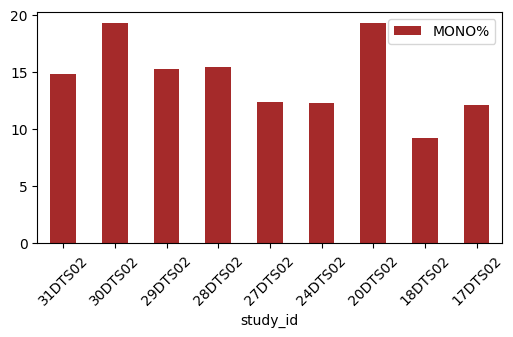

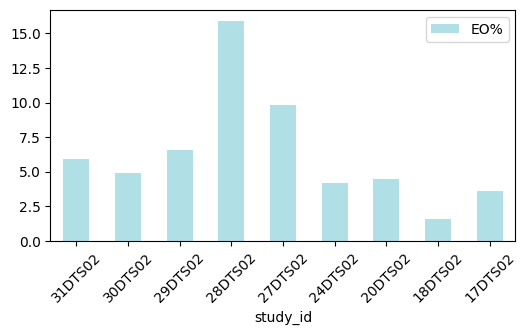

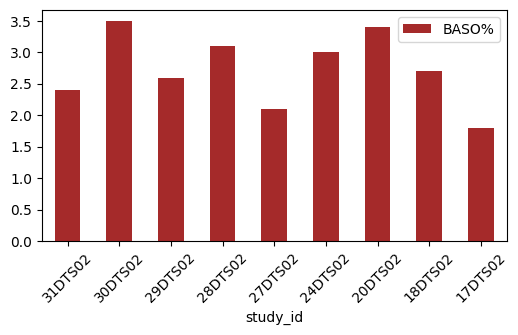

In [15]:
# saperate bar graphs

c = ["brown", "yellow", 'orange', 'black', 'green', 'powderblue']

for i in range(2, len(cols)):
    try:
        plot = df[['study_id', cols[i]]].plot(
                    kind='bar',
                    x='study_id',
                    y=cols[i],
                    rot=45,
                    color=c[random.randint(0, len(c)-1)],
                    figsize=(6,3)
                )
    except TypeError:
        pass

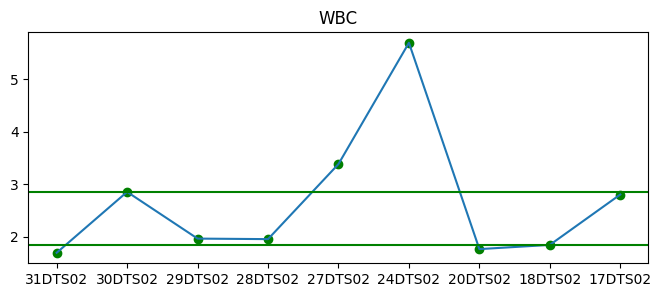

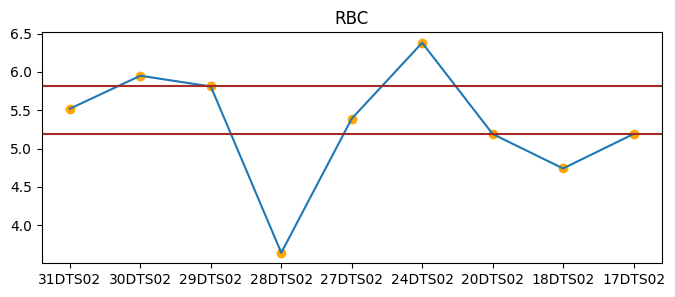

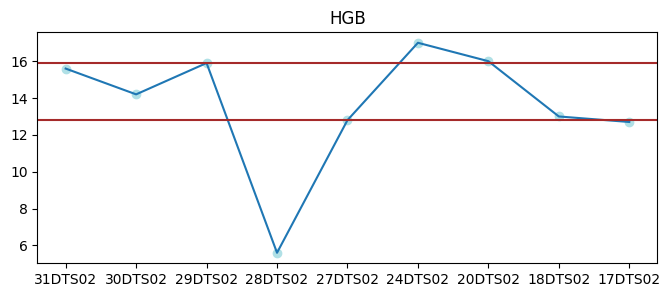

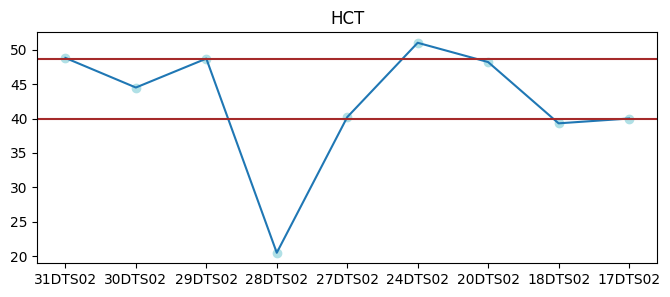

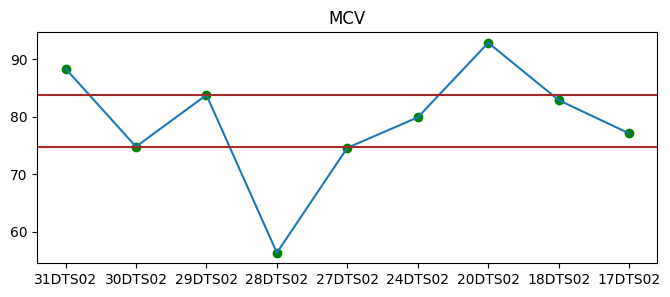

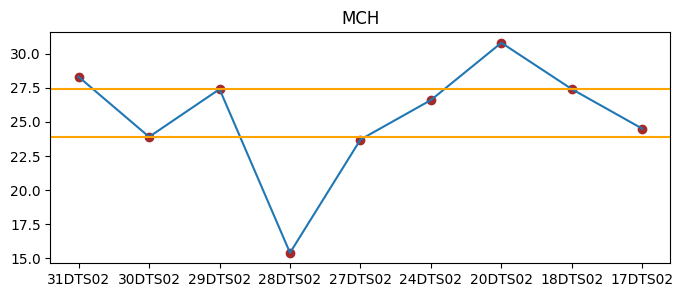

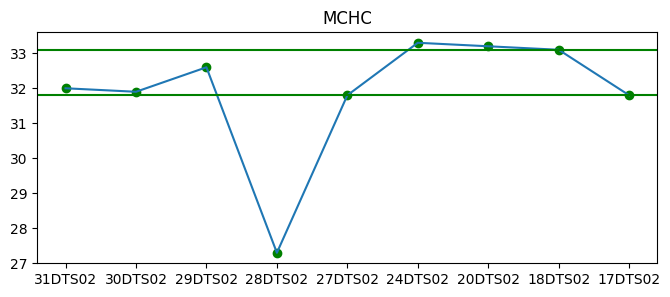

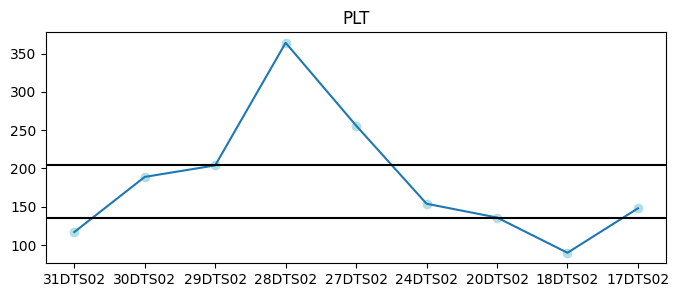

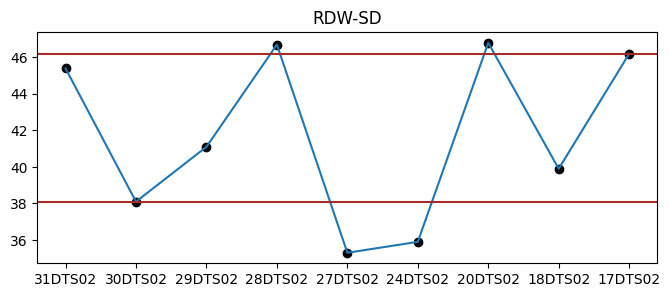

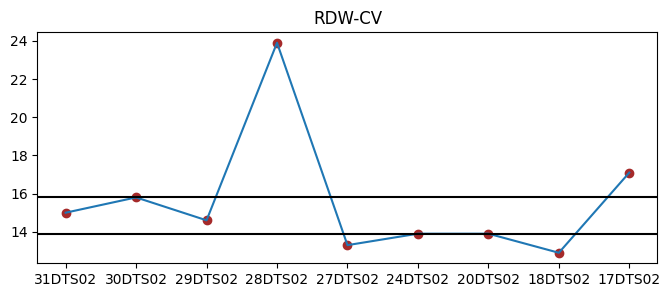

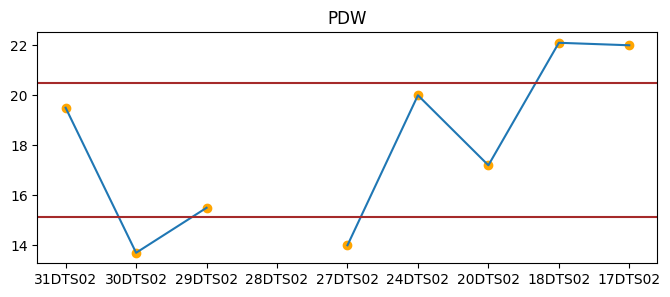

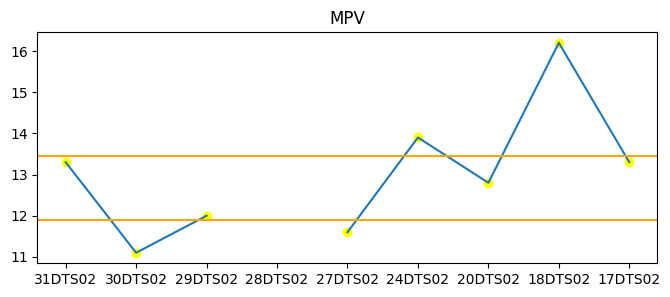

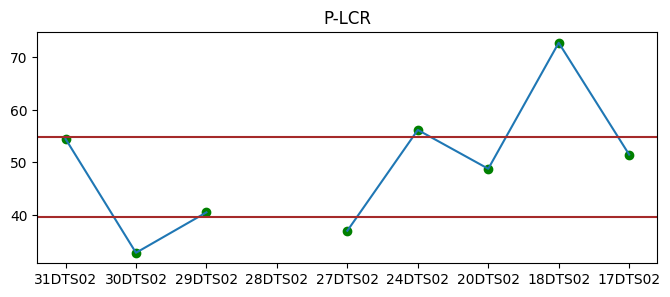

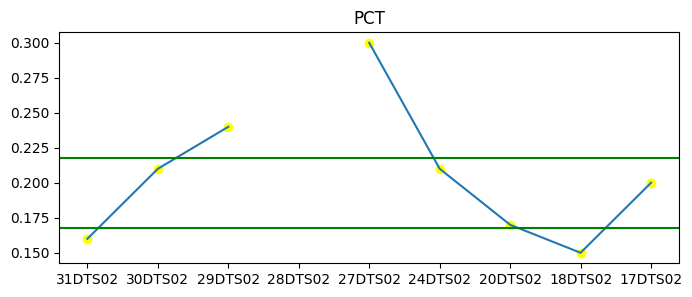

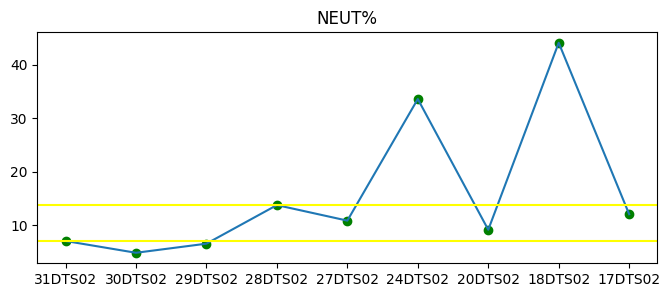

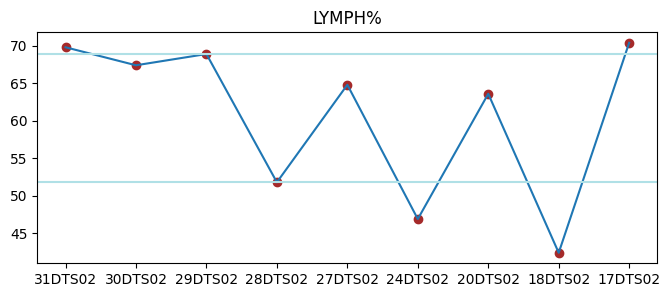

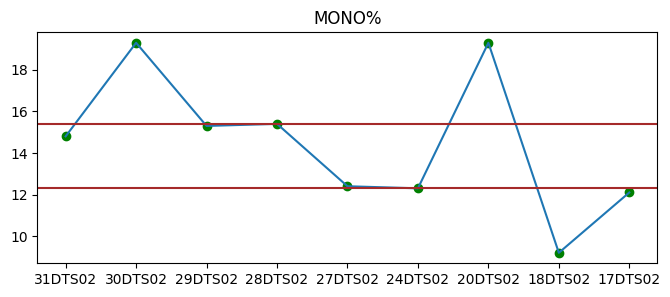

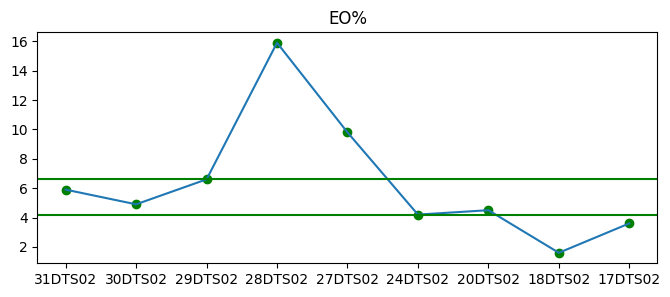

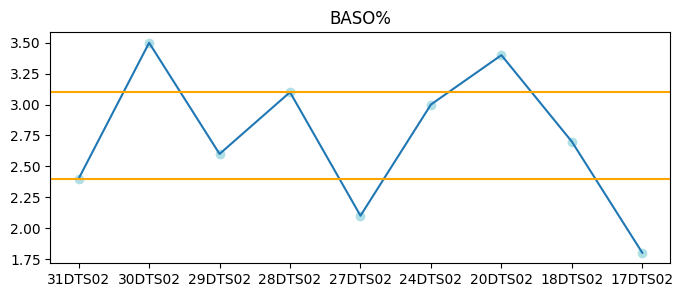

In [16]:
# clusters

c = ["brown", "yellow", 'orange', 'black', 'green', 'powderblue']

for i in range(2, len(cols)):
    try:
        figure, ax = plt.subplots(figsize=(8, 3))
        p1 = ax.scatter(
                    x=df['study_id'],
                    y=df[cols[i]],
                    c=c[random.randint(0, len(c)-1)],
                )
        p2 = ax.plot(
                    df[cols[i]]
                )
        plt.title(cols[i])
        
        hline_color = c[random.randint(0, len(c)-1)]
        
        # Ploting a horizontal line at 75% to detect outliers
        plt.axhline(y=bs[cols[i]]["75%"], color=hline_color)
        
        # Ploting a horizontal line at 25% to detect outliers
        plt.axhline(y=bs[cols[i]]["25%"], color=hline_color)
        
        figure.canvas.draw()
        figure.canvas.flush_events()
    except ValueError:
        pass

### Explain all the steps.

Steps I followed for solving question 2 are:

    1. Read the log file lines.
    2. Clean lines by removing escape charachters and space charachters.
    3. Read all lines one by one and detect header.
    4. If the header is detected extract information from next lines according to the logic described in comments.
    5. Extracted values saved in dictionary where keys are column names of data-fram which will be generate from them.
    6. After getting all rows I created pandas datafram from them.
    7. Reformatted row data types in order to perform calculations on it.
    8. Save the log data as csv.
    9. Plot bar combined and saperated bar graphs.
    10. Plot scattered plots using pyplot.
    11. Add horizontal lines in scatter plots at 75% and 25% to visualize outliers in studies.
    
Note:
    Complete code have description in comments so line by line information details can be found in comments.